## Kmeans - cluster nfl

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [ ]:
df = pd.read_csv("../database/processed/modelo_ready.csv")

config_pos = {
    'QB': ['passing_yards', 'passing_tds', 'rushing_yards', 'fantasy_points_ppr', 'interceptions'],
    'RB': ['rushing_yards', 'rushing_tds', 'receptions', 'receiving_yards', 'fantasy_points_ppr'],
    'WR': ['receptions', 'receiving_yards', 'receiving_tds', 'tgt_sh', 'ay_sh', 'fantasy_points_ppr'],
    'TE': ['receptions', 'receiving_yards', 'receiving_tds', 'tgt_sh', 'fantasy_points_ppr']
}

def rodar_kmeans_historico(df_geral, posicao, features_list, n_clusters=4):
    df_pos = df_geral[df_geral['position'] == posicao].copy()
    
    if posicao == 'QB':
        df_pos = df_pos[df_pos['passing_yards'] > 500]
    else:
        df_pos = df_pos[df_pos['fantasy_points_ppr'] > 50]
        
    X = df_pos[features_list].fillna(0)

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    inercias = []
    k_range = range(1, 11)

    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X_scaled)
        inercias.append(kmeans.inertia_)
    
    plt.xlabel(features_list[0].replace('_', ' ').title())
    plt.ylabel(features_list[2].replace('_', ' ').title())
    plt.title(f'Clusters de {posicao}: Contexto Histórico vs {ano_atual} (K={n_clusters})')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') 
    plt.tight_layout()
    plt.show()
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    
    df_pos['Cluster'] = kmeans.fit_predict(X_scaled)
    

    ano_atual = df_pos['season'].max()
    
    df_hist = df_pos[df_pos['season'] < ano_atual]

    plt.figure(figsize=(12, 7)) 
    
    sns.scatterplot(
        data=df_hist,
        x=features_list[0],
        y=features_list[2],
        color='lightgrey',
        s=50,
        alpha=0.5,
        label=f'Histórico (< {ano_atual})'
    )

    df_atual = df_pos[df_pos['season'] == ano_atual]

    sns.scatterplot(
        data=df_atual,
        x=features_list[0],
        y=features_list[2],
        hue='Cluster',
        palette='viridis',
        s=100,
        style='Cluster',
        edgecolor='black'
    )
    
    plt.title(f'Clusters de {posicao}: Contexto Histórico vs 2025')
    plt.show()
    
    return df_pos

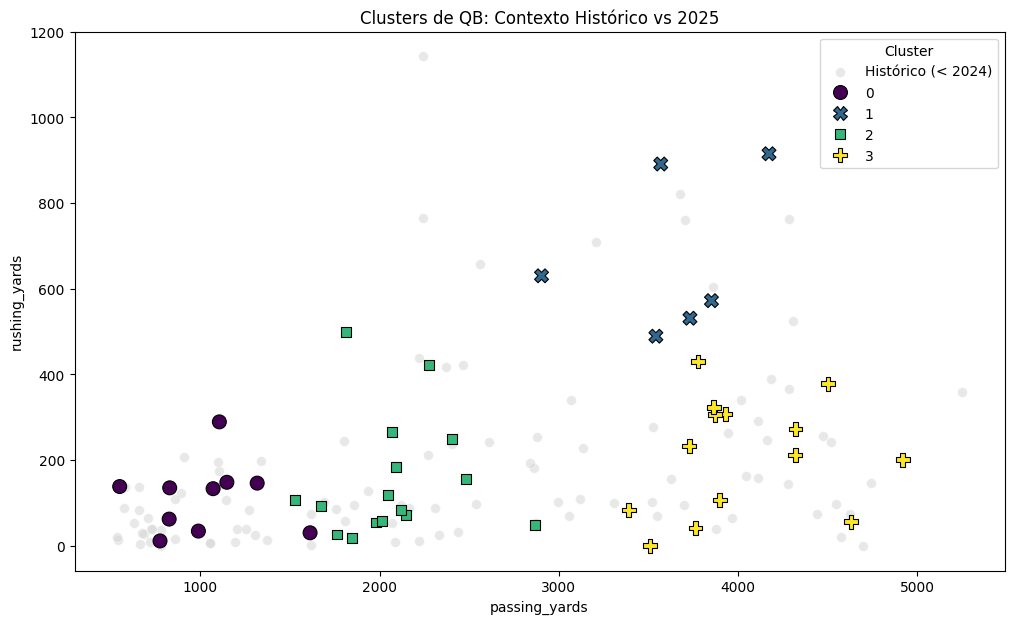

JOGADORES POR CLUSTER (Total: 46)

CLUSTER 0:
['Justin Fields', "Aidan O'Connell", 'Drew Lock', 'Deshaun Watson', 'Spencer Rattler', 'Tyler Huntley', 'Andy Dalton', 'Malik Willis', 'Jacoby Brissett', 'Michael Penix Jr.']
--------------------------------------------------
CLUSTER 1:
['Lamar Jackson', 'Josh Allen', 'Jayden Daniels', 'Jalen Hurts', 'Kyler Murray', 'Caleb Williams']
--------------------------------------------------
CLUSTER 2:
['Bryce Young', 'Tua Tagovailoa', 'Drake Maye', 'Russell Wilson', 'Anthony Richardson', 'Derek Carr', 'Trevor Lawrence', 'Daniel Jones', 'Jameis Winston', 'Will Levis']
--------------------------------------------------
CLUSTER 3:
['Joe Burrow', 'Baker Mayfield', 'Jared Goff', 'Bo Nix', 'Sam Darnold', 'Justin Herbert', 'Patrick Mahomes', 'Brock Purdy', 'Geno Smith', 'Aaron Rodgers']
--------------------------------------------------
Líderes em fantasy pontos > Cluster
1    324.162857
3    277.072093
2    142.963556
0     60.747556
Name: fantasy_point

In [46]:

df_resultado = rodar_kmeans_historico(df, 'QB', config_pos['QB'], n_clusters=4)

df_2024 = df_resultado[df_resultado['season'] == 2024]

print(f"JOGADORES POR CLUSTER (Total: {len(df_2024)})\n")

for cluster_id in sorted(df_2024['Cluster'].unique()):
    print(f"CLUSTER {cluster_id}:")
    
    top_jogadores = df_2024[df_2024['Cluster'] == cluster_id].sort_values('fantasy_points_ppr', ascending=False)
    
    print(top_jogadores['player_name'].head(10).tolist())
    print("-" * 50)

ranking = df_resultado.groupby('Cluster')['fantasy_points_ppr'].mean().sort_values(ascending=False)
print("Líderes em fantasy pontos >", ranking)

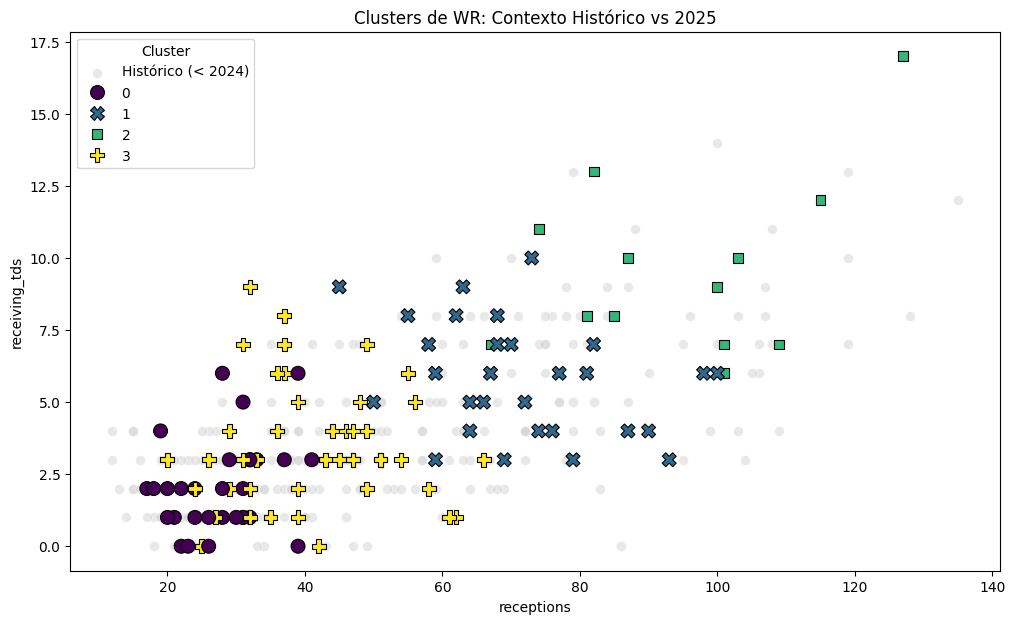

Cluster 2 (Média: 276.7 pts) -> Exemplos: ["Ja'Marr Chase", 'Justin Jefferson', 'Amon-Ra St. Brown', 'Brian Thomas Jr.', 'Drake London', 'Malik Nabers', 'Terry McLaurin', 'CeeDee Lamb', 'Garrett Wilson', 'Davante Adams', 'Mike Evans', 'Courtland Sutton', 'A.J. Brown']
Cluster 1 (Média: 199.44 pts) -> Exemplos: ['Jaxon Smith-Njigba', 'Ladd McConkey', 'Jerry Jeudy', 'DJ Moore', 'Tee Higgins', 'Tyreek Hill', 'Jakobi Meyers', 'Jordan Addison', 'Jameson Williams', 'Nico Collins', 'Jauan Jennings', 'Zay Flowers', 'Puka Nacua', 'DeVonta Smith', 'Calvin Ridley', 'Marvin Harrison Jr.', 'Darnell Mooney', 'DK Metcalf', 'Xavier Worthy', 'Keenan Allen', "Wan'Dale Robinson", 'Khalil Shakir', 'Josh Downs', 'Cooper Kupp', 'Quentin Johnston', 'Rashod Bateman', 'Michael Pittman', 'George Pickens', 'Chris Godwin']
Cluster 3 (Média: 118.69 pts) -> Exemplos: ['Jayden Reed', 'Alec Pierce', 'Deebo Samuel Sr.', 'Jalen Tolbert', 'Jaylen Waddle', 'Demario Douglas', 'DeAndre Hopkins', 'Rome Odunze', 'Ray-Ray McC

In [43]:
df_wr_resultado = rodar_kmeans_historico(df, 'WR', config_pos['WR'], n_clusters=4)

ano_atual = df_wr_resultado['season'].max()
df_wr_atual = df_wr_resultado[df_wr_resultado['season'] == ano_atual]

resumo = df_wr_atual.groupby('Cluster').agg({
    'fantasy_points_ppr': 'mean',
    'receiving_yards': 'mean',
    'tgt_sh': 'mean',       
    'player_name': 'count'
}).sort_values('fantasy_points_ppr', ascending=False).round(2)

#display(resumo)

for cluster_id in resumo.index:
    top_jogadores = df_wr_atual[df_wr_atual['Cluster'] == cluster_id].sort_values('fantasy_points_ppr', ascending=False)
    
    nomes = top_jogadores['player_name'].tolist()
    media_pts = resumo.loc[cluster_id, 'fantasy_points_ppr']
    
    print(f"Cluster {cluster_id} (Média: {media_pts} pts) -> Exemplos: {nomes}")

In [49]:
jogador_alvo = "Zay Flowers"

ano_atual = df_wr_resultado['season'].max()
df_2024 = df_wr_resultado[df_wr_resultado['season'] == ano_atual].copy()

try:
    stats_zay = df_2024[df_2024['player_name'] == jogador_alvo].iloc[0]
    pontos_zay = stats_zay['fantasy_points_ppr']
    cluster_zay = stats_zay['Cluster']
    
    print(f"Pontos Totais: {pontos_zay}")
    print(f"Cluster Atual: {cluster_zay}")

    melhores_que_zay = df_2024[df_2024['fantasy_points_ppr'] > pontos_zay]
    
    qtd_melhores = len(melhores_que_zay)
    
    print(f"Existem {qtd_melhores} jogadores melhores que o {jogador_alvo} hoje.")
    print(f"Isso faz dele o WR #{qtd_melhores + 1} da temporada.")
    
except IndexError:
    print(f"Erro: O jogador '{jogador_alvo}' não foi encontrado no dataset de {ano_atual}.")

Pontos Totais: 209.5
Cluster Atual: 1
Existem 24 jogadores melhores que o Zay Flowers hoje.
Isso faz dele o WR #25 da temporada.


#### Ainda é preciso descobrir o número ideal de clusters e calcular a silhueta